In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

import warnings
warnings.filterwarnings('ignore')

import os
from zipfile import ZipFile

# 設定 data_path
dir_data = './data/'

In [103]:
# 查看壓縮檔內的資料
f_path = os.path.join(dir_data, 'titanic.zip')
print('Path of read in data: %s' % (f_path))

myzip=ZipFile(f_path)
for i in myzip.filelist:
    print(i.filename)

Path of read in data: ./data/titanic.zip
gender_submission.csv
test.csv
train.csv


In [104]:
# 讀取壓縮檔內的資料
f=myzip.open('train.csv')
train=pd.read_csv(f)
f.close()

f=myzip.open('test.csv')
test=pd.read_csv(f)
f.close()

myzip.close()

In [105]:
# 查看資料大小
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [106]:
# 查看資料內容
def columns_type(df_data):
    dtype_df = df_data.dtypes.reset_index()
    dtype_df.columns = ['Columns', 'Type']
    dtype_df_count = dtype_df.groupby(['Type'])['Columns'].count().reset_index()
    for t, n in zip(dtype_df_count.Type, dtype_df_count.Columns):
        print('類型 : ',t,'\n')
        print('  個數 : ',n,'\n')
        print('  ',list(dtype_df[dtype_df.Type==t].Columns),'\n')
        print('-----------------------------------------------\n')
        
def object_check(df_data):    
    object_type = df_data.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0).reset_index() 
    object_type.columns = ["Column", "Unique Count"]
    display(object_type.head(10))        
        
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
    
columns_type(train)
object_check(train)
na_check(train)

類型 :  int64 

  個數 :  5 

   ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'] 

-----------------------------------------------

類型 :  float64 

  個數 :  2 

   ['Age', 'Fare'] 

-----------------------------------------------

類型 :  object 

  個數 :  5 

   ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 

-----------------------------------------------



,Column,Unique Count
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,147
4,Embarked,3


,Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


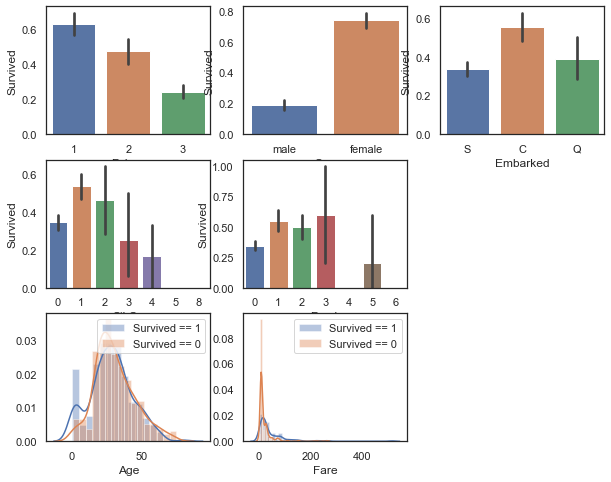

In [107]:
# 設定繪圖區域的長與寬
fig = plt.figure(figsize = (10, 8), dpi=72, 
           facecolor="white",edgecolor="green")

# 設定子圖
ax_1 = fig.add_subplot(3, 3, 1)
sns.barplot(x='Pclass',y='Survived',data=train)

ax_2 = fig.add_subplot(3, 3, 2)
sns.barplot(x='Sex',y='Survived',data=train)

ax_3 = fig.add_subplot(3, 3, 3)
sns.barplot(x='Embarked',y='Survived',data=train)

ax_4 = fig.add_subplot(3, 3, 4)
sns.barplot(x='SibSp',y='Survived',data=train)

ax_5 = fig.add_subplot(3, 3, 5)
sns.barplot(x='Parch',y='Survived',data=train)

ax_7 = fig.add_subplot(3, 3, 7)
sns.distplot(train.loc[train['Survived'] == 1, 'Age'], label = 'Survived == 1')
sns.distplot(train.loc[train['Survived'] == 0, 'Age'], label = 'Survived == 0')
ax_7.legend()

ax_8 = fig.add_subplot(3, 3, 8)
sns.distplot(train.loc[train['Survived'] == 1, 'Fare'], label = 'Survived == 1')
sns.distplot(train.loc[train['Survived'] == 0, 'Fare'], label = 'Survived == 0')
ax_8.legend()

plt.plot()
plt.show()

In [108]:
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = train['Survived']
ids = test['PassengerId']
train_X = train.drop(['PassengerId', 'Survived'] , axis=1)
test = test.drop(['PassengerId'] , axis=1)
df = pd.concat([train_X,test], axis=0)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
print(df.shape)

(1309, 10)


In [110]:
print(df.columns)
df.describe()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [111]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
df_etl = df.copy()
df_etl['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [114]:
df_etl = df.copy()
# 'Pclass' OK

# 'SibSp', 'Parch' OK
df_etl['Total_Family']=df_etl['SibSp'] + df_etl['Parch']
df_etl['Total_Family_cut3']=0
df_etl['Total_Family_cut3'][df_etl['Total_Family']!=0]=pd.cut(df_etl['Total_Family'][df_etl['Total_Family']!=0],3,labels=[1,2,3])

# 'Age' 補中位數
df_etl['Age']=df_etl['Age'].fillna(df_etl['Age'].median())

# 'Fare'
df_etl['Fare_qcut10']=pd.qcut(df_etl['Fare'],10,labels=range(10))

# 'Name' 
import re
pattern = re.compile('\S*\.')
df_etl['Name_title'] = df_etl['Name'].apply(lambda x: pattern.findall(x)[0])

# 'Sex' OK

# 'Ticket'
Ticket_c=df_etl.groupby(['Ticket'])['Name'].count().reset_index(name='n')
df_etl['Ticket'].isin(Ticket_c[Ticket_c.n>1]['Ticket'])
df_etl['tkts']=df['Ticket'].isin(Ticket_c[Ticket_c.n>1]['Ticket']).astype('int')

# 'Cabin' 補NA
df_etl['Cabin']=df_etl['Cabin'].fillna('NA')

# 'Embarked' 補NA
df_etl['Embarked']=df_etl['Embarked'].fillna('NA')


# drop
df_etl=df_etl.drop(columns=['Total_Family'])
df_etl=df_etl.drop(columns=['Name'])
df_etl=df_etl.drop(columns=['Ticket'])

# GET DUMMIES
df_etl=pd.get_dummies(df_etl,drop_first = True)
df_etl.head(10)

,Pclass,Age,SibSp,Parch,Fare,tkts,Sex_male,Cabin_A11,Cabin_A14,Cabin_A16,...,Name_title_Major.,Name_title_Master.,Name_title_Miss.,Name_title_Mlle.,Name_title_Mme.,Name_title_Mr.,Name_title_Mrs.,Name_title_Ms.,Name_title_Rev.,Name_title_Sir.
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,28.0,0,0,8.4583,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1,54.0,0,0,51.8625,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,3,2.0,3,1,21.0750,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,3,27.0,0,2,11.1333,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2,14.0,1,0,30.0708,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [115]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [116]:
df_mms = MinMaxScaler().fit_transform(df_etl)
train_num = train_Y.shape[0]
train_X = df_mms[:train_num]
print('train_X',train_X.shape)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=12)

train_X (891, 225)


In [117]:
model01 = LogisticRegression()

model01.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#(model01.predict_proba(X_train,)[:,1]>=0.5).astype('int') # 進行預測
y_pred = model01.predict_proba(X_test,)[:,1]

In [124]:
y_pred

array([0.40997468, 0.32214005, 0.1199562 , 0.37355165, 0.03732503,
       0.41887334, 0.64460079, 0.82811778, 0.12635152, 0.11418104,
       0.36274353, 0.13604729, 0.11412689, 0.75854432, 0.6016479 ,
       0.08589981, 0.13408289, 0.59109863, 0.1032837 , 0.11121124,
       0.38866844, 0.1916615 , 0.09330822, 0.21485022, 0.66306078,
       0.32146199, 0.82467145, 0.64481896, 0.0667688 , 0.93876093,
       0.07491894, 0.08817291, 0.69421815, 0.10882805, 0.08015098,
       0.94501355, 0.15031002, 0.09188421, 0.15845641, 0.68716941,
       0.11122176, 0.1368786 , 0.88245459, 0.51871395, 0.01511224,
       0.06445641, 0.95095005, 0.06838749, 0.10905846, 0.09440545,
       0.32633554, 0.96098283, 0.95466245, 0.40864467, 0.11121124,
       0.11121124, 0.1225703 , 0.97181525, 0.63659293, 0.25436407,
       0.04355866, 0.37784644, 0.58913414, 0.38779643, 0.09051619,
       0.94744248, 0.76738393, 0.81896407, 0.11963019, 0.10557018,
       0.13319936, 0.0998027 , 0.18523127, 0.39366541, 0.69421

In [79]:
#model01.predict(X_train,) # 進行預測

In [119]:
fpr,tpr,threshold = metrics.roc_curve(y_test, y_pred) ###計算真正率和假正率
roc_auc = metrics.auc(fpr,tpr) ###計算auc的值

print('roc_auc : ',roc_auc)

roc_auc :  0.849886805595867


In [120]:
def model_roc_curve(fpr=fpr,tpr=tpr):
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

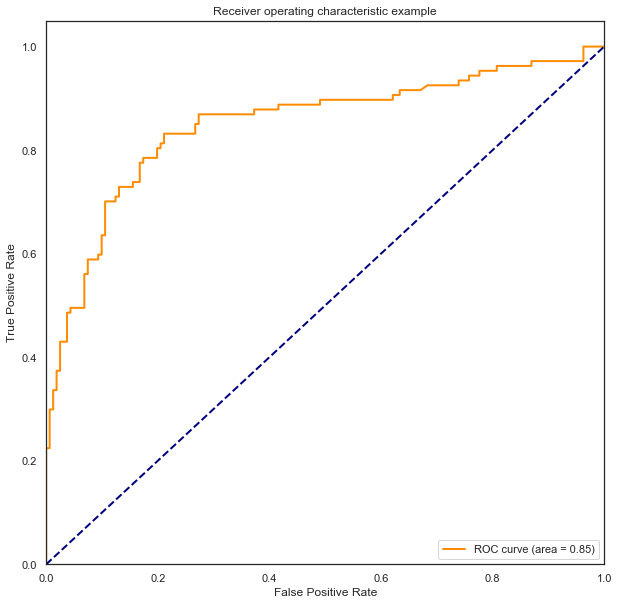

In [121]:
model_roc_curve(fpr=fpr,tpr=tpr)

<Figure size 720x576 with 0 Axes>

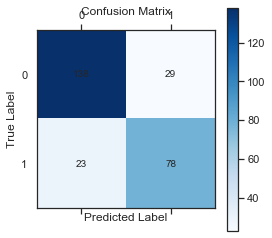

[[138  23]
 [ 29  78]]


In [122]:
plt.figure(figsize = (10, 8), dpi=72, 
           facecolor="white",edgecolor="green")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_binarized)
plt.matshow(cnf_matrix,cmap = plt.cm.Blues) # 背景颜色
plt.colorbar() # 颜色标签
 
# 内部添加图例标签
for x in range(len(cnf_matrix)):
    for y in range(len(cnf_matrix)):
        plt.annotate(cnf_matrix[x,y], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

print(cnf_matrix)

In [123]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
accuracy=metrics.accuracy_score(y_test, y_pred_binarized)
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print('Accuracy: ',accuracy)
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.8059701492537313
F1-Score:  0.7499999999999999
Precision:  0.7722772277227723
Recall:  0.7289719626168224
